## US Oil and Gas Production

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [14]:
file = "U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.tail(12)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
109,2017-07-01,88713,6636,1900,609,1365,3091,4661,4390,846,14746,22004,6871,5040,1888,3625,133,5822,4520,568
110,2017-08-01,89166,7148,1888,599,1412,2900,4691,4632,845,14525,21544,7040,5169,1933,3610,134,5917,4623,556
111,2017-09-01,91914,8512,1865,602,1386,2875,4734,4648,841,14809,21883,7055,5359,1930,3756,130,6304,4672,553
112,2017-10-01,93169,9135,1851,589,1363,2544,4741,4654,829,14504,22431,7304,5464,2052,3844,130,6436,4750,548
113,2017-11-01,95847,9420,1820,587,1367,2658,4835,4766,823,15705,22693,7334,5603,2095,3954,128,6762,4748,547
114,2017-12-01,96810,9523,1792,576,1332,2482,4907,4770,810,16193,22654,7372,5839,2087,3881,129,7032,4883,547
115,2018-01-01,95418,9573,1670,564,1325,2531,4860,4569,826,16136,22030,7332,5911,2072,3662,127,6815,4873,543
116,2018-02-01,97225,9593,1665,565,1350,2634,4809,4652,825,16482,22409,7513,6110,2095,3791,124,7173,4886,549
117,2018-03-01,98278,9542,1646,568,1391,2667,4854,4725,842,16280,22751,7763,6161,2114,3976,122,7448,4882,545
118,2018-04-01,98618,9424,1712,569,1350,2476,4839,4607,837,16368,23097,7836,6134,2245,4037,125,7471,4947,544


In [17]:
gas_df.shape

(121, 20)

In [18]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [19]:
gas_df.dtypes[0:2] #checking the types of the first two columns

Month    object
U.S.      int64
dtype: object

## Converting the Month column to datetime

In [27]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')

In [21]:
gas_df.dtypes[0:2]

Month    datetime64[ns]
U.S.              int64
dtype: object

In [22]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [23]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

## Yearly Gas production

How much gas has been produced yearly globally and in every state of the US?

In [26]:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()
yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


Text(0.5, 0, 'Year')

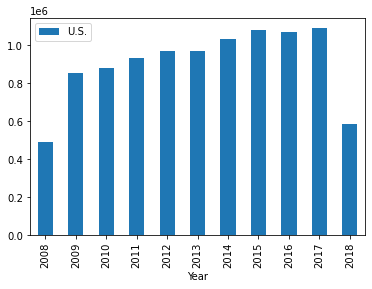

In [25]:
us_yearly_production_plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
us_yearly_production_plot.set_xlabel("Year")

In [30]:
monthly_gas_df = gas_df.groupby(gas_df['Month'].dt.month).sum()

Text(0.5, 0, 'Month')

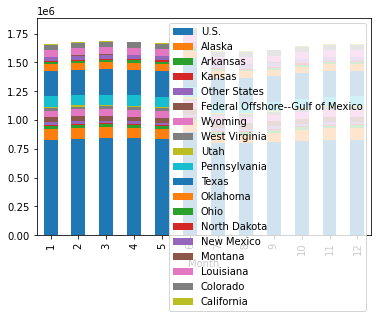

In [34]:
monthly_gas_df_plot = monthly_gas_df.plot(kind="bar", stacked=True)
monthly_gas_df_plot.set_xlabel("Month")

## discard the first and last rows of yearly_gas_df based on the year

Text(0.5, 0, 'Year')

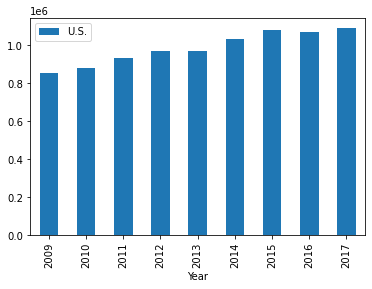

In [38]:
full_years = np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)
full_yearly_gas_df = yearly_gas_df[full_years]
plot = full_yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")

---

## Comparing with Crude Oil Production

Create a new dataframe for the oil using the pd.read_csv() function.

In [40]:
file = "U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file, decimal=",")
oil_df.head()

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [41]:
oil_df['Month'] = pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')

-- Grouping by year

In [42]:
yearly_oil_df = gas_df.groupby(gas_df['Month'].dt.year).sum()
yearly_oil_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


Then create two dataframes yearly_gas and yearly_oil by grouping by year, summing and filtering the global production for both commodities. Rename the columns to Gas and Crude oil.

In [43]:
yearly_gas = gas_df.groupby(gas_df['Month'].dt.year).sum().filter(items=['U.S.'])
yearly_gas.columns = [ 'Gas' ]
yearly_gas.head(3)

,Gas
Month,
2008,489473
2009,856876
2010,881622


In [44]:
yearly_oil = oil_df.groupby(oil_df['Month'].dt.year).sum().filter(items=['U.S. Crude Oil '])
yearly_oil.columns = [ 'Crude Oil' ]
yearly_oil.head(3)

,Crude Oil
Month,
2008,34211
2009,64180
2010,65741


Now that you have those two dataframes, create one by concatenating both. Store this new dataframe into a yearly_merged variable. You should use the pd.concat(), and don’t forget to set the axis parameter!

In [45]:
yearly_merged = pd.concat([yearly_oil, yearly_gas], axis='columns')

In [46]:
yearly_merged

,Crude Oil,Gas
Month,,
2008,34211,489473
2009,64180,856876
2010,65741,881622
2011,67829,936163
2012,78007,968632
2013,89585,970617
2014,105064,1032439
2015,113179,1082158
2016,105970,1070085


In [ ]:
yearly_merged_plot =